## EDA OF DATASCIENCE SALARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("ds_salaries 1.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.shape

(607, 11)

In [5]:
#check the columns name
list[df.columns]

list[Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')]

In [6]:
##check the columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
##Extracting thhose columns whose datatypes is object datatype
[features for features in df.columns if df[features].dtype=="O"]    

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [8]:
##Extracting those columns whose datatype is int
[features for features in df.columns if df[features].dtype==int]

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [9]:
## finding the uniqque values in each columns
exp_level=list(df["experience_level"].unique())
emp_type=list(df["employment_type"].unique())
sal_curr=list(df["salary_currency"].unique())
emp_res=list(df["employee_residence"].unique())
comp_loc=list(df["company_location"].unique())
comp_size=list(df["company_size"].unique())


print("experience levels are",exp_level)
print("emp_types_are",emp_type)
print("sal_curr",sal_curr)
print("emp residence",emp_res)
print("company loc",comp_loc)
print("company size",comp_size)

experience levels are ['MI', 'SE', 'EN', 'EX']
emp_types_are ['FT', 'CT', 'PT', 'FL']
sal_curr ['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD', 'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF']
emp residence ['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL', 'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES', 'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA', 'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS', 'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO', 'IE', 'CH']
company loc ['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT', 'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU', 'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR', 'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE']
company size ['L', 'S', 'M']


In [10]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [11]:
## no of salary currencys are
print("no of salary currencys are",df["salary_currency"].value_counts().shape[0])
print("no of employee residence are",df["employee_residence"].value_counts().shape[0])
print("no of different company locations",df["company_location"].value_counts().shape[0])

no of salary currencys are 17
no of employee residence are 57
no of different company locations 50


In [12]:
## if we wants to see that what is the value_counts of the company locations
df["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [14]:
## checking the missing values in the columns
df.isnull().sum()

#--so  no null vaalues are present in the dataset

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [15]:
## checking the duplicate values
df.duplicated().value_counts()

False    565
True      42
dtype: int64

In [16]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [17]:
##remove the duplicates
df=df.drop_duplicates()
df.shape

(565, 11)

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [19]:
##companies with different sizes are
df["company_size"].value_counts()


M    290
L    193
S     82
Name: company_size, dtype: int64

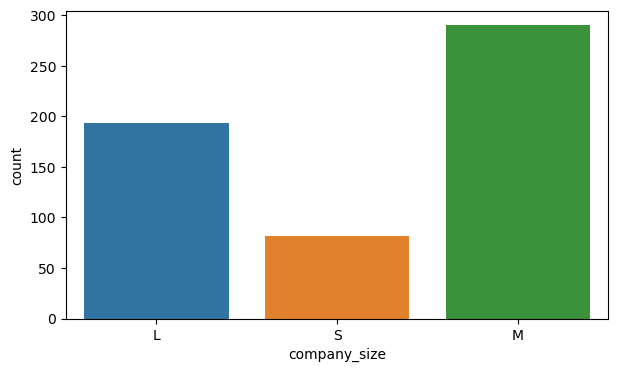

In [20]:
## companies with different sizes are visualize
plt.subplots(figsize=(7,4))
sns.countplot(x=df["company_size"],data=df)
plt.show()

In [21]:
## different experience levels are
df["experience_level"].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

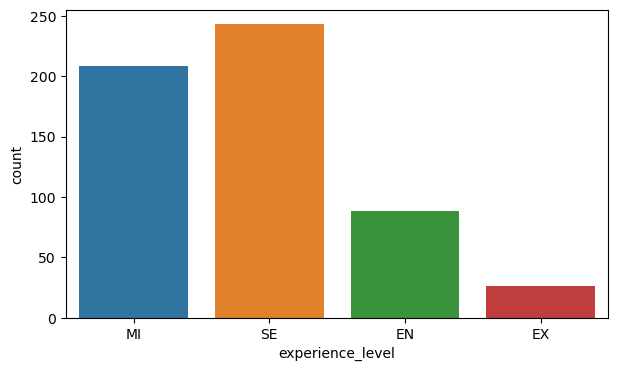

In [22]:
## diiferent experience levels are visualization
plt.subplots(figsize=(7,4))
sns.countplot(x=df["experience_level"],data=df)
plt.show()

In [23]:
## different employeement type
df["employment_type"].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

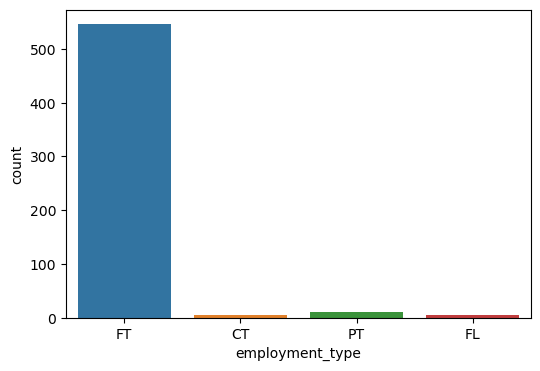

In [24]:
## different  employeement type
plt.subplots(figsize=(6,4))
sns.countplot(x=df["employment_type"],data=df)
plt.show()

In [25]:
df["experience_level"].value_counts()


SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [26]:
##finding the index of experience level
df["experience_level"].value_counts().index


Index(['SE', 'MI', 'EN', 'EX'], dtype='object')

## DATA DISTRIBUTION

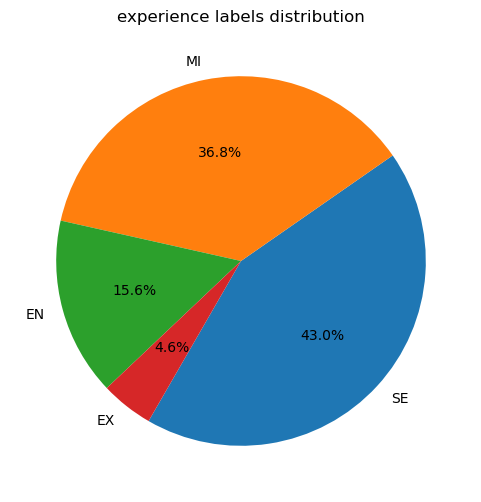

In [27]:
## CREATE  A PIE CHART --THAT SHOWS THE EXPERIENCELEVEL DISTRIBUTION
experience_counts=df["experience_level"].value_counts()
plt.figure(figsize=(7,6))
plt.pie(experience_counts,labels=experience_counts.index,autopct="%1.1f%%",startangle=240)
plt.title("experience labels distribution")
plt.show()

In [28]:
##work type distribution
df["remote_ratio"].value_counts()
##1-work from home,2-office work,3-hybrid

100    346
0      121
50      98
Name: remote_ratio, dtype: int64

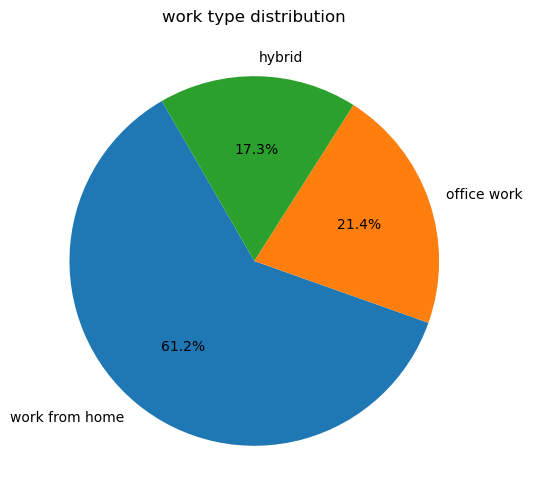

In [29]:
work_type_counts=df["remote_ratio"].value_counts()
#pie chart that shows the work type distribution
plt.figure(figsize=(8,6))
plt.pie(work_type_counts,labels=["work from home","office work","hybrid"],autopct="%1.1f%%",startangle=120)
plt.title("work type distribution")
plt.show()

In [30]:

##pie chart for company size
company_size_count=df["company_size"].value_counts()

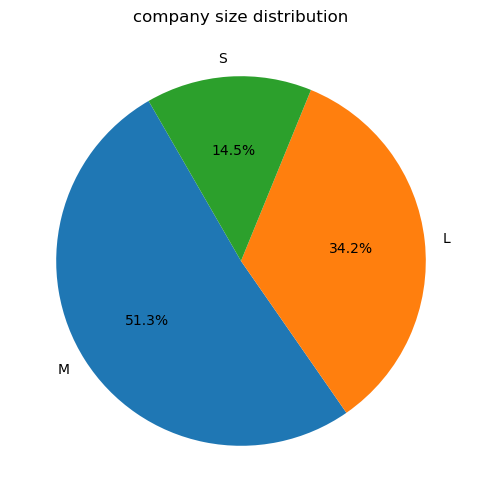

In [31]:
plt.figure(figsize=(8,6))
plt.pie(company_size_count,labels=company_size_count.index,autopct="%1.1f%%",startangle=120)
plt.title("company size distribution")
plt.show()

In [32]:
#give the dataset which belongs to diffrent different company size

In [33]:
df["company_size"].value_counts()


M    290
L    193
S     82
Name: company_size, dtype: int64

In [34]:
## give the dataset of the mega comapnies
#

## MEGA COMPANY

In [35]:
mega_comapnies_A=df[df["company_size"]=="M"]
mega_comapnies_A=mega_comapnies_A.drop("company_size",axis=1)
mega_comapnies_A.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR
18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN
19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,100,US
20,2020,MI,FT,Machine Learning Engineer,299000,CNY,43331,CN,0,CN


## LARGE COMPANY DATA

In [36]:
large_company_A=df[df["company_size"]=="L"]
large_company_A=large_company_A.drop("company_size",axis=1)
large_company_A.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US


## SMALL COMPANY DATA

In [37]:
small_company_A=df[df["company_size"]=="S"]
small_company_A=small_company_A.drop("company_size",axis=1)
small_company_A.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR


In [41]:
mega_comapnies_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 2 to 605
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           290 non-null    int64 
 1   experience_level    290 non-null    object
 2   employment_type     290 non-null    object
 3   job_title           290 non-null    object
 4   salary              290 non-null    int64 
 5   salary_currency     290 non-null    object
 6   salary_in_usd       290 non-null    int64 
 7   employee_residence  290 non-null    object
 8   remote_ratio        290 non-null    int64 
 9   company_location    290 non-null    object
dtypes: int64(4), object(6)
memory usage: 24.9+ KB


In [42]:
numeric_columns=mega_comapnies_A.select_dtypes(include=["number"]).columns
numeric_columns=numeric_columns.drop("salary")
grouped=mega_comapnies_A.groupby(["job_title","salary"])[numeric_columns].mean().round(2).reset_index()
grouped

,job_title,salary,work_year,salary_in_usd,remote_ratio
0,3D Computer Vision Researcher,400000,2021.0,5409.0,50.0
1,AI Scientist,12000,2021.0,12000.0,100.0
2,AI Scientist,120000,2022.0,120000.0,0.0
3,Analytics Engineer,135000,2022.0,135000.0,100.0
4,Analytics Engineer,175000,2022.0,175000.0,100.0
...,...,...,...,...,...
237,Principal Data Scientist,148000,2022.0,162674.0,100.0
238,Research Scientist,53000,2021.0,62649.0,50.0
239,Research Scientist,80000,2021.0,63810.0,100.0
240,Research Scientist,450000,2020.0,450000.0,0.0


In [43]:
##sort the dataframe by salary in descending order
mega_comapnies_B=grouped.sort_values(by="salary",ascending=False)
mega_comapnies_B

,job_title,salary,work_year,salary_in_usd,remote_ratio
205,Data Scientist,2500000,2021.0,33808.0,0.0
204,Data Scientist,2100000,2021.0,28399.0,100.0
145,Data Engineer,1600000,2021.0,21637.0,50.0
203,Data Scientist,1400000,2022.0,18442.0,100.0
14,Business Data Analyst,1400000,2022.0,18442.0,100.0
...,...,...,...,...,...
231,Machine Learning Scientist,12000,2021.0,12000.0,50.0
15,Computer Vision Engineer,10000,2022.0,10000.0,100.0
20,Data Analyst,8760,2021.0,10354.0,50.0
154,Data Scientist,4000,2021.0,4000.0,0.0


In [44]:
mega_comapnies_B=mega_comapnies_A[["work_year","job_title","salary"]]
mega_comapnies_B=mega_comapnies_B.sort_values(by="salary",ascending=False)
mega_comapnies_B=mega_comapnies_B.head(20)
mega_comapnies_B=mega_comapnies_B.groupby("job_title").mean().round(2).reset_index()
mega_comapnies_B=mega_comapnies_B.sort_values(by="salary",ascending=True)
mega_comapnies_B

,job_title,work_year,salary
7,Head of Data Science,2022.00,224000.00
5,Data Science Manager,2022.00,241000.00
2,Data Architect,2022.00,266400.00
8,Machine Learning Engineer,2020.00,299000.00
0,3D Computer Vision Researcher,2021.00,400000.00
4,Data Science Consultant,2020.00,423000.00
3,Data Engineer,2021.71,442874.29
9,Research Scientist,2020.00,450000.00
6,Data Scientist,2021.60,1298000.00
1,Business Data Analyst,2022.00,1400000.00


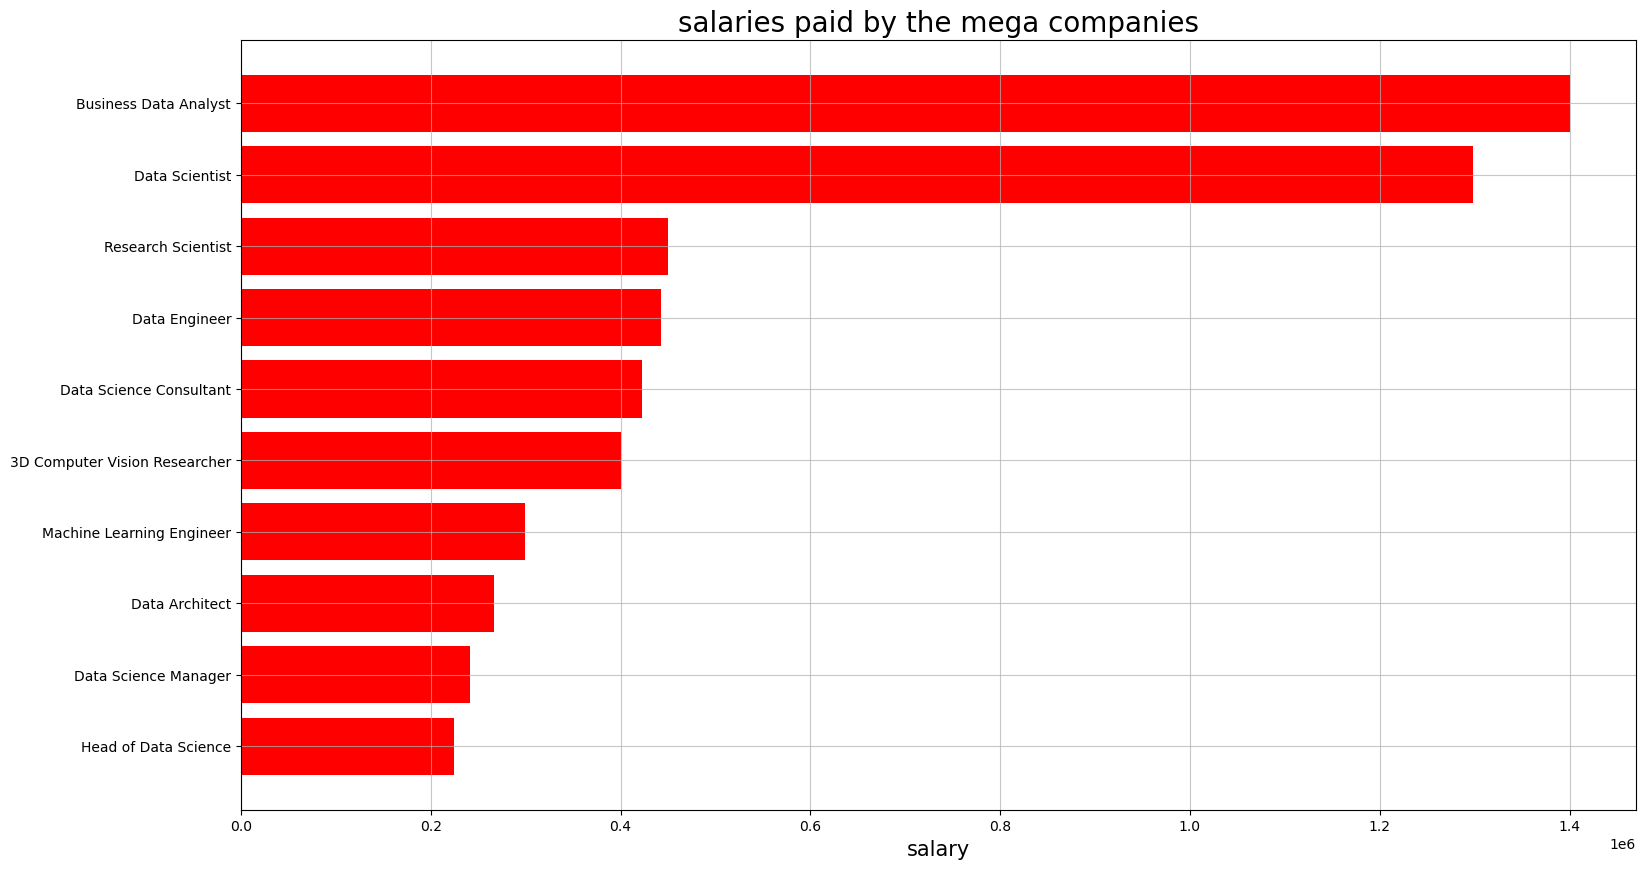

In [45]:
## top 10 highest paid by big  companies to job title
plt.figure(figsize=(18,10))
plt.barh(mega_comapnies_B["job_title"],mega_comapnies_B["salary"],color="r")
plt.title("salaries paid by the mega companies",fontsize=20)
plt.grid(alpha=0.7)
plt.xlabel("salary",fontsize=15)
plt.show()

## MEDIUM COMAPNIES

In [46]:
large_company_B=large_company_A[["work_year","job_title","salary"]]
large_company_B=large_company_B.sort_values(by="salary",ascending=False)
large_company_B=large_company_B.head(20)
large_company_B=large_company_B.groupby("job_title").mean().round(2).reset_index()
large_company_B=large_company_B.sort_values(by="salary",ascending=True)
large_company_B

,job_title,work_year,salary
5,Financial Data Analyst,2021.0,450000.00
11,Product Data Analyst,2020.0,450000.00
10,Principal Data Engineer,2021.0,600000.00
1,Big Data Engineer,2021.0,1102333.33
7,Lead Data Analyst,2021.0,1450000.00
2,Data Engineer,2021.0,2250000.00
8,Lead Data Scientist,2021.0,3000000.00
9,Machine Learning Engineer,2021.0,3349998.50
3,Data Science Manager,2021.0,5500000.00
6,Head of Machine Learning,2022.0,6000000.00


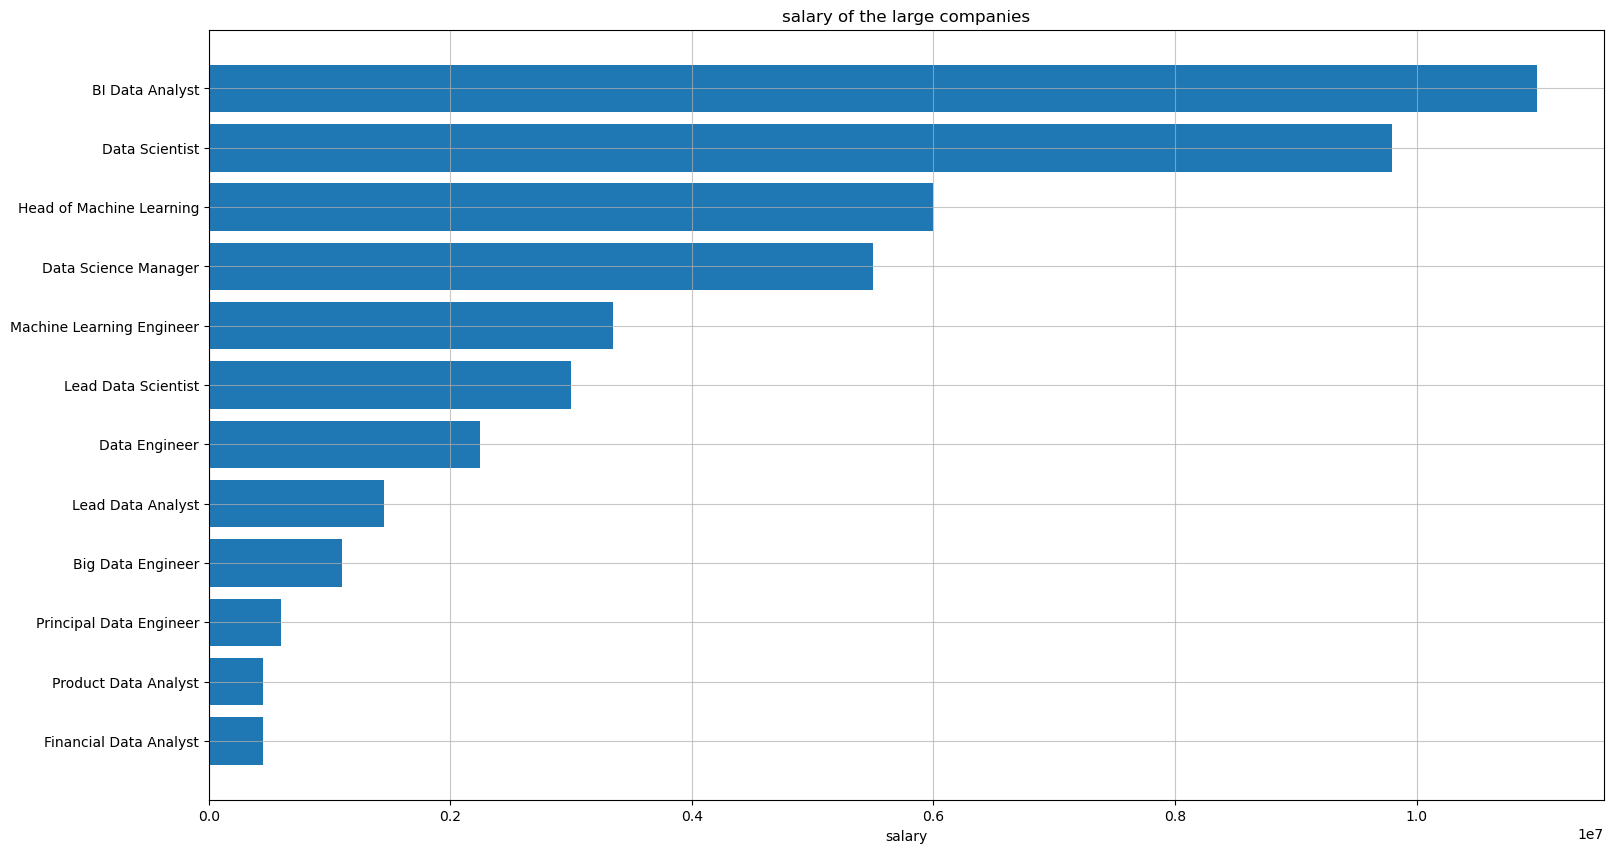

In [47]:
plt.figure(figsize=(18,10))
plt.barh(large_company_B["job_title"],large_company_B["salary"])
plt.grid(alpha=0.7)
plt.title("salary of the large companies")
plt.xlabel("salary")
plt.show()

## small companies

In [48]:
small_company_B=small_company_A[["job_title","work_year","salary"]]
small_company_B=small_company_B.sort_values(by="salary",ascending=False)
small_company_B=small_company_B.head(20)
small_company_B=small_company_B.groupby("job_title").mean().round(2).reset_index()
small_company_B=small_company_B.sort_values(by="salary",ascending=True)
small_company_B

,job_title,work_year,salary
3,Computer Vision Software Engineer,2022.0,150000.0
8,Lead Data Engineer,2021.5,155000.0
1,Cloud Data Engineer,2021.0,160000.0
7,Director of Data Science,2021.0,168000.0
2,Computer Vision Engineer,2021.0,180000.0
9,Lead Data Scientist,2020.0,190000.0
11,Machine Learning Scientist,2020.0,260000.0
12,Principal Data Scientist,2021.0,416000.0
4,Data Analyst,2020.0,450000.0
6,Data Scientist,2021.0,790000.0


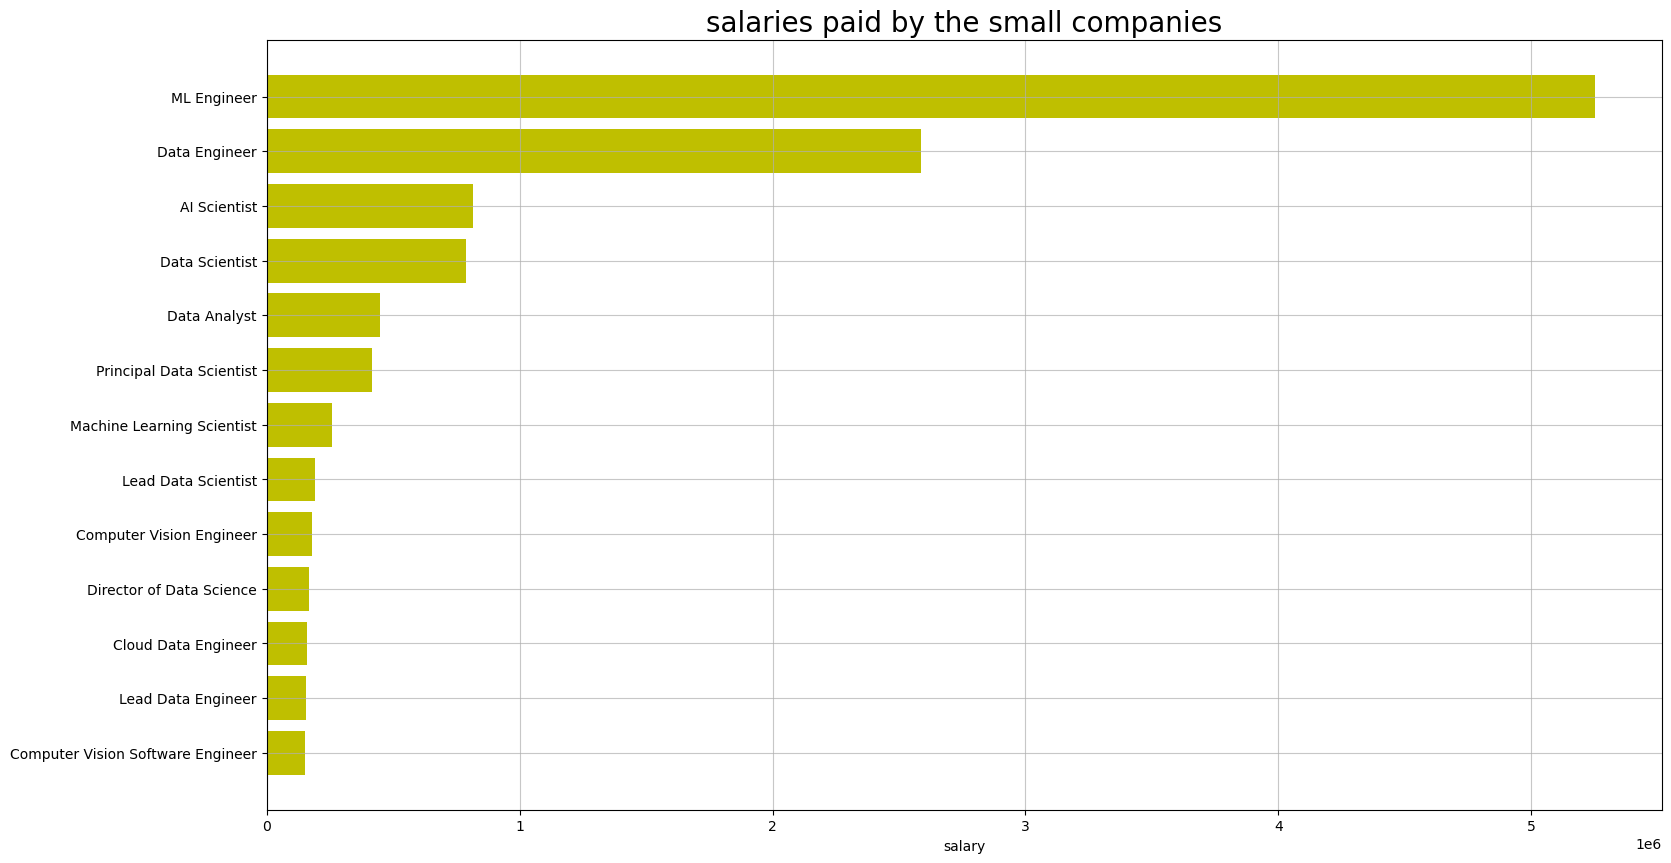

In [49]:
plt.figure(figsize=(18,10))
plt.barh(small_company_B["job_title"],small_company_B["salary"],color="y")
plt.grid(alpha=0.7)
plt.title("salaries paid by the small companies",fontsize=20)
plt.xlabel("salary")
plt.show()

## JOB TITLE SALARIES

In [50]:
s=df[["job_title","salary"]]
s=s.groupby("job_title").mean().round(2).reset_index()
s=s.sort_values(by="salary",ascending=True)

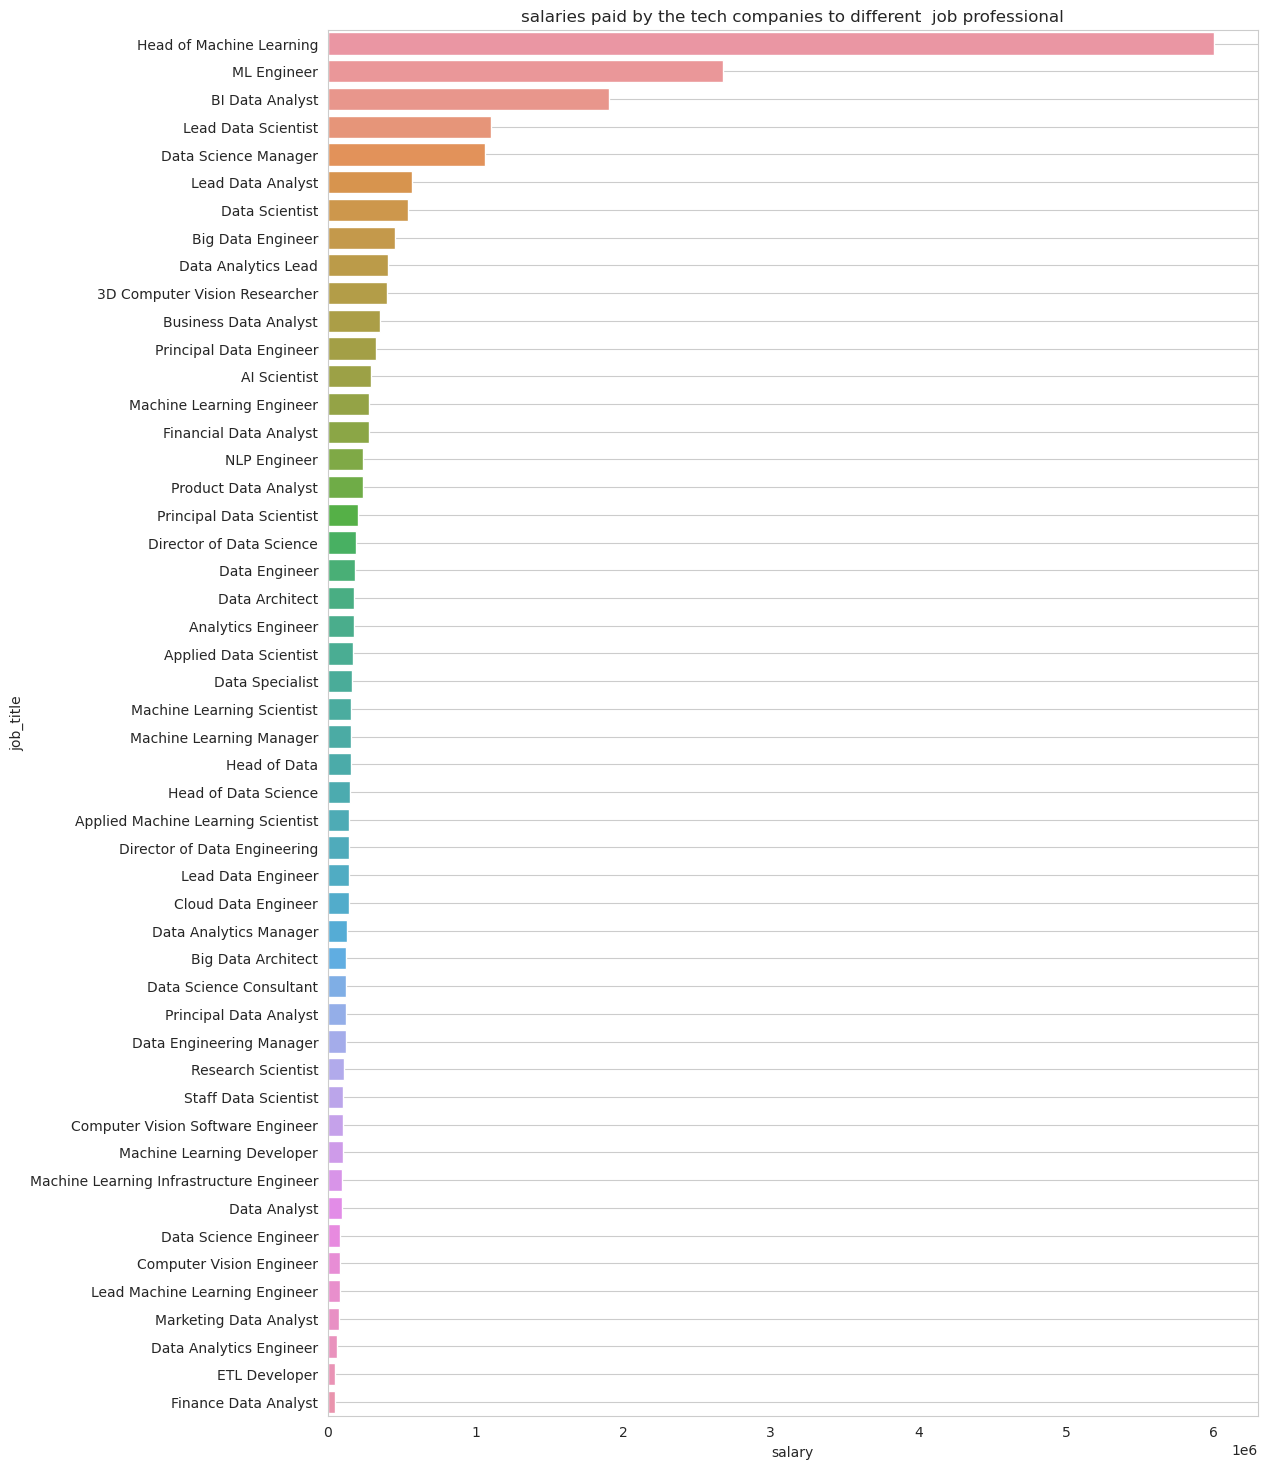

In [51]:
s=s.sort_values(by="salary",ascending=False) ## salary in descending order
sns.set_style("whitegrid")
plt.figure(figsize=(12,18)) ## adjust the figure size as needed
sns.barplot(x="salary",y="job_title",data=s)
plt.xlabel("salary")
plt.ylabel("job_title")
plt.title("salaries paid by the tech companies to different  job professional")
plt.grid()
plt.show()

## Employment type analysis

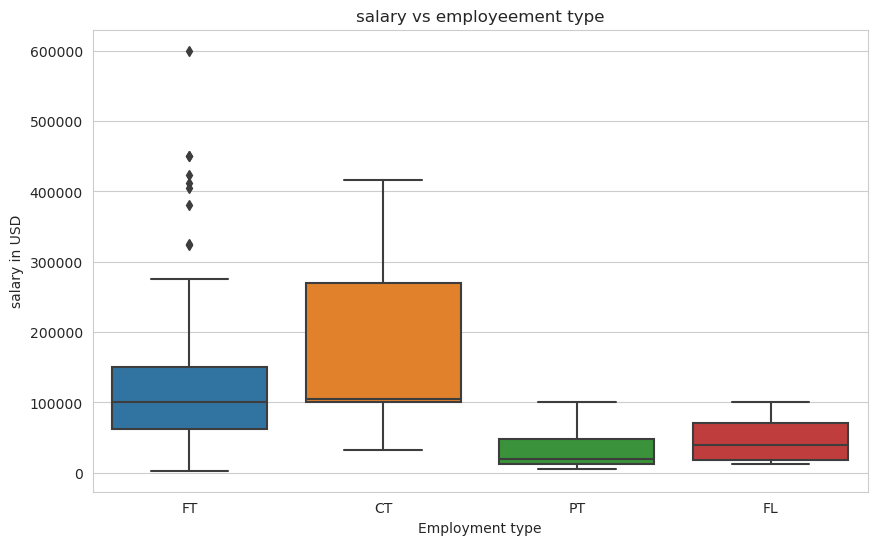

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["employment_type"],y=df["salary_in_usd"],data=df)
plt.xlabel("Employment type")
plt.ylabel("salary in USD")
plt.title("salary vs employeement type")
plt.show()

## EXPERIENCE LEBEL ANALYSIS


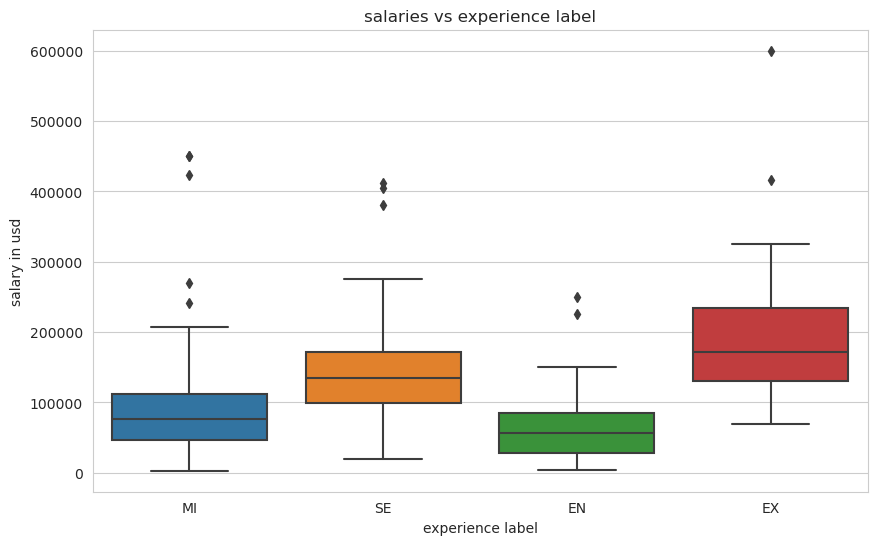

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["experience_level"],y=df["salary_in_usd"],data=df)
plt.xlabel("experience label")
plt.ylabel("salary in usd")
plt.title("salaries vs experience label")
plt.show()

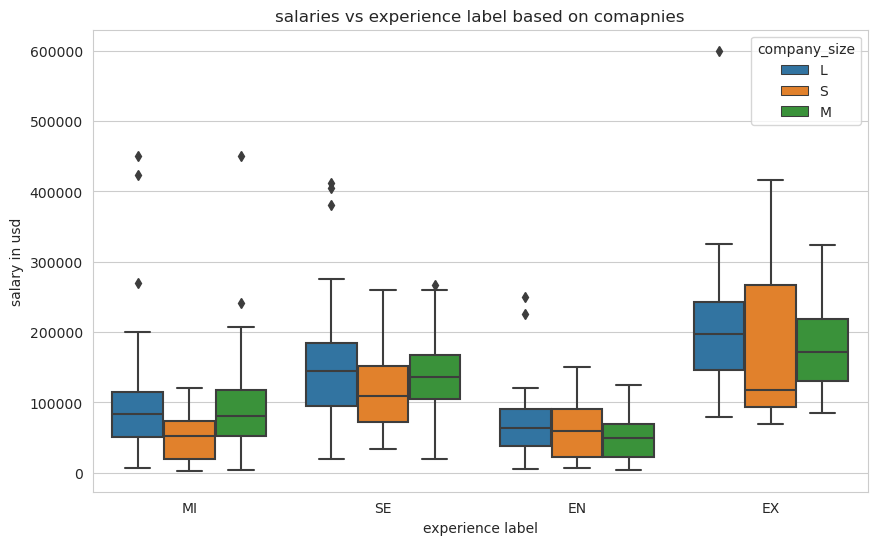

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["experience_level"],y=df["salary_in_usd"],data=df,hue=df["company_size"])
plt.xlabel("experience label")
plt.ylabel("salary in usd")
plt.title("salaries vs experience label based on comapnies")
plt.legend(title="company_size")
plt.show()

In [55]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [56]:
## DATA SCIENTIST SALARY  ACCROSS DIFFERENT EMPLOYEE RESIDENCE


In [57]:
m=df.groupby("job_title").get_group("Data Scientist")
m=m[["salary","employee_residence"]]
m=m.groupby("employee_residence").mean().round(2).reset_index()
m=m.sort_values(by="salary",ascending=True)
m.tail(10)

,employee_residence,salary
7,DZ,100000.00
4,CH,115000.00
1,AU,120000.00
25,US,147082.58
19,PL,150000.00
22,SG,160000.00
23,TR,180000.00
13,IN,1774444.44
12,HU,11000000.00
5,CL,30400000.00


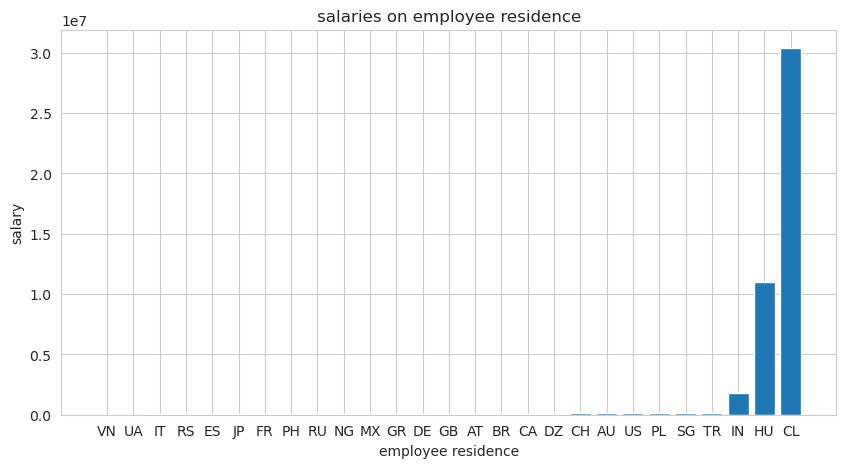

In [60]:
plt.figure(figsize=(10,5))
plt.bar(m["employee_residence"],m["salary"])
plt.xlabel("employee residence")
plt.ylabel("salary")
plt.title("salaries on employee residence")

plt.show()

In [66]:
c1=df.groupby("job_title").get_group("Data Scientist")
c1=c1[["salary","company_location"]]
c1=c1.groupby("company_location").mean().round(2).reset_index()
c1=c1.sort_values(by="salary",ascending=True)
c1=c1.tail(10)
c1

,company_location,salary
7,DZ,100000.00
4,CH,115000.00
1,AU,120000.00
22,US,145572.36
19,PL,150000.00
12,IL,160000.00
20,TR,180000.00
13,IN,1943750.00
11,HU,11000000.00
5,CL,30400000.00


In [69]:
salary_curr=df[["salary_currency","salary_in_usd"]]
salary_curr=salary_curr.groupby("salary_currency").mean().round(2).reset_index()
salary_curr=salary_curr.sort_values(by="salary_in_usd",ascending=True)
salary_curr

,salary_currency,salary_in_usd
1,BRL,15904.00
12,MXN,18185.00
15,TRY,20096.67
10,INR,27765.56
9,HUF,35997.00
13,PLN,36887.67
6,DKK,37252.50
4,CLP,40038.00
5,CNY,40283.50
11,JPY,60921.33


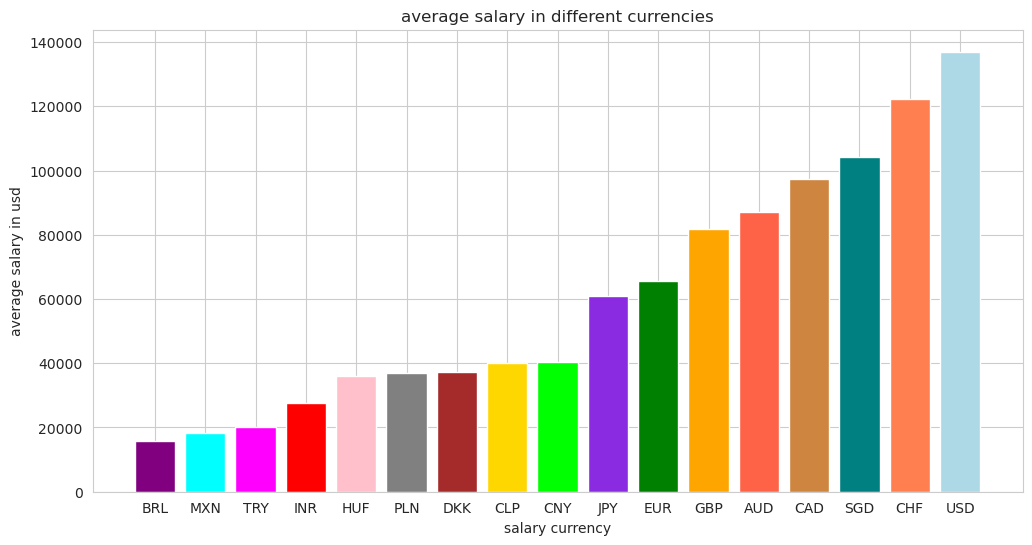

In [ ]:
colors={
    "USD":"Lightblue",
    "EUR":"green",
    "GBP":"orange",
    "INR":"red",
    "BRL":"purple",
    "MXN":"cyan",
    "TRY":"magenta",
    "DKK":"brown",
    "HUF":"pink",
    "PLN":"grey",
    "CNY":"lime",
    "CLP":"gold",
    "JPY":"blueviolet",
    "AUD":"tomato",
    "SGD":"teal",
    "CAD":"peru",
    "CHF":"coral",
    "CZK":"dodgrblue"
}

plt.figure(figsize=(12,6))
plt.bar(salary_curr["salary_currency"],salary_curr["salary_in_usd"],
        color=[colors.get(currency,"gray") for currency in salary_curr["salary_currency"]])
plt.xlabel("salary currency")
plt.ylabel("average salary in usd")
plt.title("average salary in different currencies")
plt.tight_layout
plt.show()